In [1]:
import kagglehub;
import pandas as pd;
import seaborn as sns


# Download most recent version of individual-age-of-death-and-related-factors from kaggle
path = kagglehub.dataset_download("joannpineda/individual-age-of-death-and-related-factors")
file = path + "/data.json";

# Read data
df = pd.read_json(file);

In [2]:
df.columns

Index(['age', 'weight', 'sex', 'height', 'sys_bp', 'smoker', 'nic_other',
       'num_meds', 'occup_danger', 'ls_danger', 'cannabis', 'opioids',
       'other_drugs', 'drinks_aweek', 'addiction', 'major_surgery_num',
       'diabetes', 'hds', 'cholesterol', 'asthma', 'immune_defic',
       'family_cancer', 'family_heart_disease', 'family_cholesterol'],
      dtype='object')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,64.6357,23.193680,25.0,46.0,64.0,82.0,120.0
weight,10000.0,214.7255,35.624989,97.0,190.0,214.0,238.0,366.0
height,10000.0,67.2371,3.897127,53.0,64.0,67.0,70.0,82.0
sys_bp,10000.0,126.4824,14.279162,67.0,117.0,126.0,136.0,180.0
num_meds,10000.0,4.5905,5.512372,0.0,0.0,3.0,7.0,53.0
occup_danger,10000.0,1.9968,0.819425,1.0,1.0,2.0,3.0,3.0
ls_danger,10000.0,2.0056,0.816600,1.0,1.0,2.0,3.0,3.0
drinks_aweek,10000.0,9.9834,5.556601,0.0,6.0,9.0,13.0,37.0
major_surgery_num,10000.0,4.1709,2.964013,0.0,2.0,4.0,6.0,16.0
cholesterol,10000.0,199.7361,35.633212,83.0,175.0,199.0,223.0,351.0


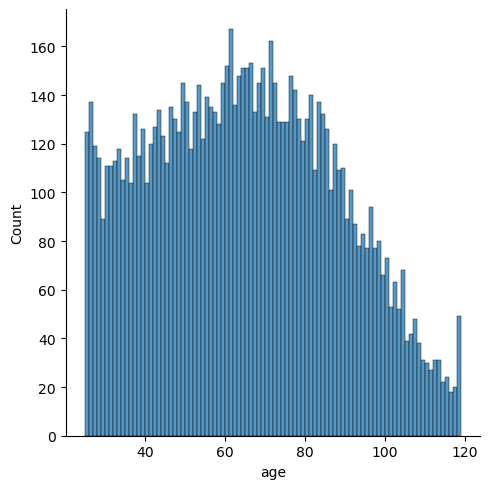

In [6]:
sns.displot(df.age, bins=list(range(25, 120)))

<Axes: xlabel='weight', ylabel='age'>

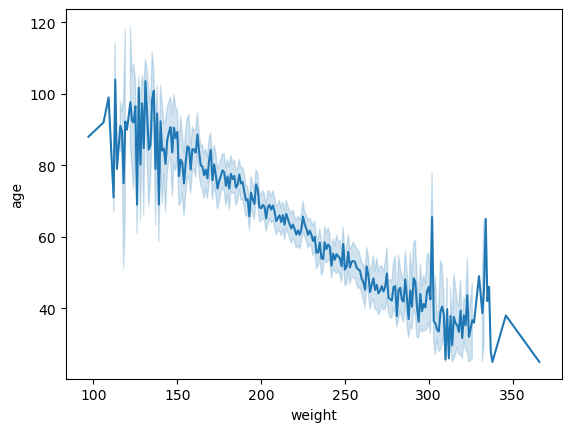

In [3]:
sns.lineplot(x=df.weight,  y=df.age)

<Axes: xlabel='smoker', ylabel='age'>

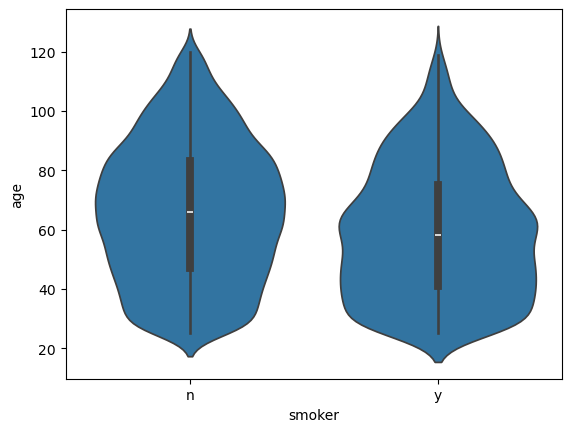

In [4]:
sns.violinplot(x=df.smoker,  y=df.age)

<Axes: xlabel='drinks_aweek', ylabel='age'>

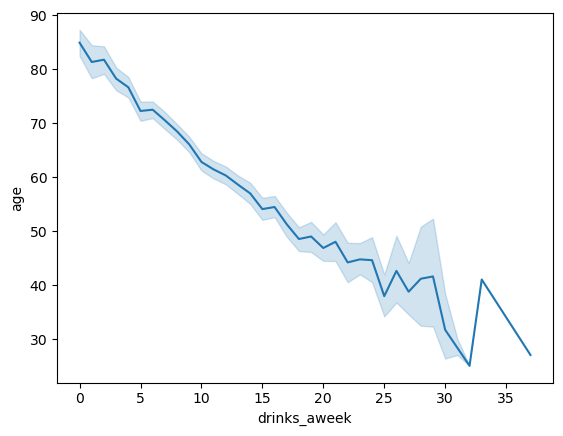

In [5]:
sns.lineplot(x=df.drinks_aweek,  y=df.age)

<Axes: xlabel='family_cancer', ylabel='age'>

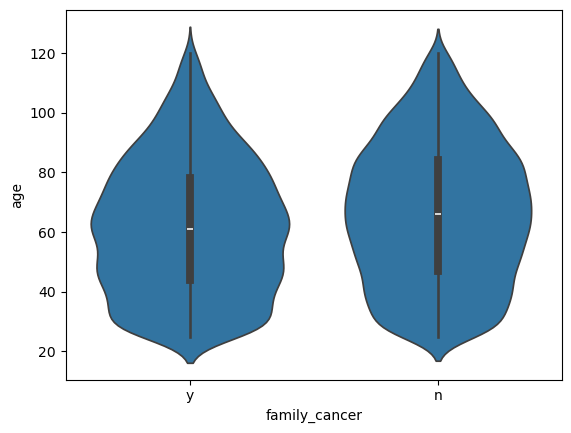

In [7]:
sns.violinplot(x=df.family_cancer,  y=df.age)

In [8]:
# Add calculated feature BMI
df["bmi"] = 703*df.weight/pow(df.height,2);

<Axes: xlabel='bmi', ylabel='age'>

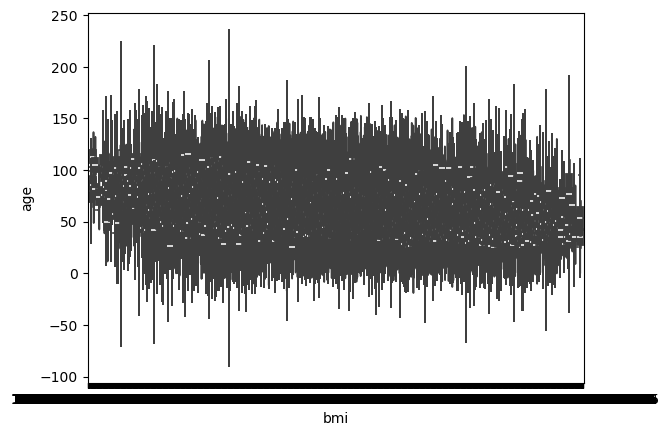

In [9]:
sns.violinplot(x=df.bmi, y=df.age)

In [10]:
# Add calculated feature OBESE
def obesity_level(bmi):
    if bmi >= 40:
        return 5;
    elif bmi >= 35:
        return 4;
    elif bmi >= 30:
        return 3;
    elif bmi >= 25:
        return 2;
    else:
        return 1;

def obese(level):
    if level >= 3:
        return True;
    else:
        return False;
        
df["obesity_level"] = df.bmi.map(obesity_level);
df["obesity"] = df.bmi.map(obese);


<Axes: xlabel='obesity_level', ylabel='age'>

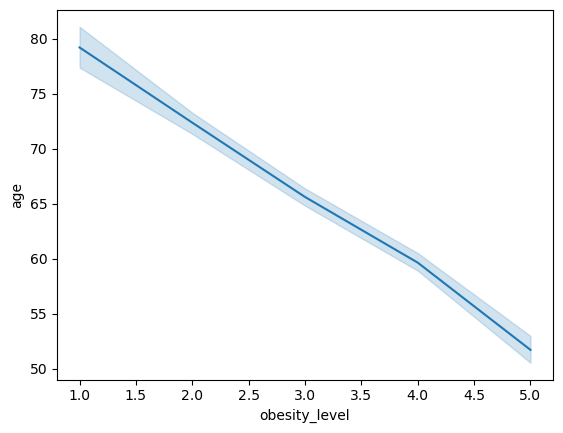

In [11]:
sns.lineplot(x=df.obesity_level,  y=df.age)

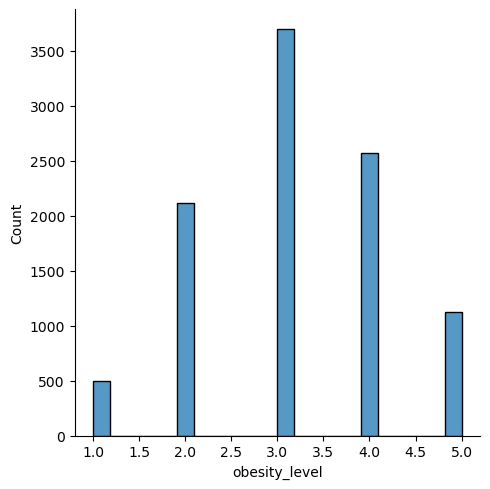

In [12]:
sns.displot(x=df.obesity_level)

<Axes: xlabel='obesity_level', ylabel='age'>

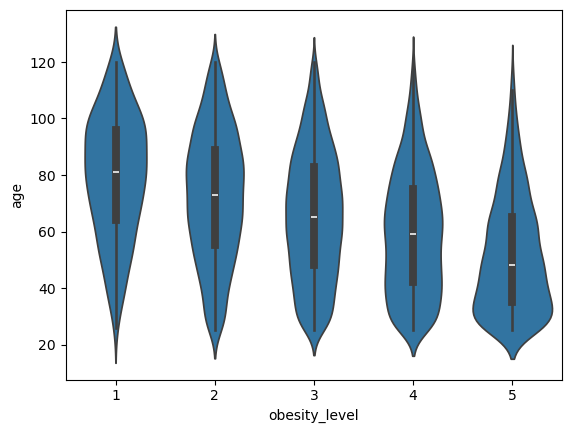

In [13]:
sns.violinplot(
    x=df.obesity_level, y=df.age,
)


<Axes: xlabel='obesity_level', ylabel='age'>

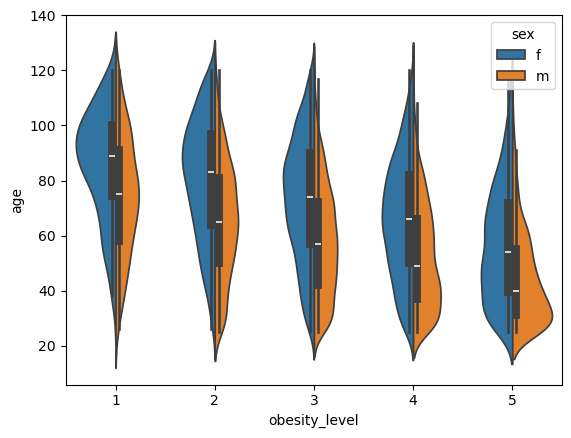

In [14]:
sns.violinplot(
    x=df.obesity_level, y=df.age, hue=df.sex, split=True,
)


In [15]:
df.sort_values("age", ascending=False)

,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol,bmi,obesity_level,obesity
9630,120,146,m,72,133,n,n,0,3,3,...,n,130,n,n,y,n,n,19.798997,1,True
8504,120,205,f,65,114,n,n,0,3,2,...,n,190,n,n,n,n,n,34.110059,3,True
2229,120,148,f,65,118,n,y,7,3,3,...,n,134,n,n,n,n,n,24.625799,1,True
8799,120,216,m,65,133,n,n,0,1,1,...,y,201,n,n,n,n,n,35.940355,4,True
4283,120,157,f,62,97,n,y,0,2,2,...,n,143,n,n,n,n,n,28.712539,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,25,196,f,64,111,n,n,24,1,2,...,y,180,n,n,n,n,y,33.639648,3,True
3667,25,274,m,72,135,n,n,1,1,2,...,y,259,y,y,n,n,y,37.157022,4,True
3715,25,235,m,69,146,n,y,11,2,2,...,y,220,n,n,n,n,n,34.699643,3,True
3724,25,215,f,65,129,n,n,26,3,2,...,n,203,n,n,y,n,n,35.773964,4,True


In [16]:
df.set_option('display.max_rows', 100)

AttributeError: 'DataFrame' object has no attribute 'set_option'